# Apsect Labeling

In [27]:
# import necessary packages
import numpy as np
import pandas as pd

In [28]:
# read  dataset
df = pd.read_csv('DataAferEDA.csv')
#read dictionary
dict = pd.read_csv('dictionary.csv')

In [29]:
df.head()

,Unnamed: 0,Name,Time,Store,Comment
0,0,macantonioc,25-06-2007,DigInfo,interesting
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep


In [30]:
dict.head()

,term,aspect
0,store,general
1,grocery,general
2,shop,general
3,shopping,general
4,customer,general


In [31]:
# show unique aspects in dictionary
dict['aspect'].unique()

array(['general', 'experience', 'product', 'unemployment', 'data',
       'privacy', 'payment', 'price', 'marketing', 'technology'],
      dtype=object)

In [32]:
# create a new table from df with a null column named label
df_label = df
df_label['label'] = np.nan

In [33]:
df_label

,Unnamed: 0,Name,Time,Store,Comment,label
0,0,macantonioc,25-06-2007,DigInfo,interesting,NaN
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,NaN
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,NaN
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,NaN
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,NaN
...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,NaN
209574,223256,Mark H.,09-09-2020,Walmart,walmart,NaN
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,NaN
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,NaN


In [34]:
#function to count the number of words in each category
def countWords(df_label, dict):
    for i in range(len(df_label)):
        tech = 0
        gen = 0
        data = 0
        mar = 0
        exp = 0
        price = 0
        priv = 0
        pro = 0
        pay = 0
        unemploy=0
        # convert the comment to array type
        df_label['label'][i] = ['']
        for j in range(len(dict)):
            if dict['term'][j] in df_label['Comment'][i]:
                if dict['aspect'][j] == 'technology':
                    tech += 1
                elif dict['aspect'][j] == 'general':
                    gen += 1
                elif dict['aspect'][j] == 'data':
                    data += 1
                elif dict['aspect'][j] == 'marketing':
                    mar += 1
                elif dict['aspect'][j] == 'experience':
                    exp += 1
                elif dict['aspect'][j] == 'price':
                    price += 1
                elif dict['aspect'][j] == 'privacy':
                    priv += 1
                elif dict['aspect'][j] == 'product':
                    pro += 1
                elif dict['aspect'][j] == 'payment':
                    pay += 1
                elif dict['aspect'][j] == 'unemployment':
                    unemploy += 1
        # find the max value and assign the label
        # exclude the case when all values are 0
        if tech != 0 or gen != 0 or data != 0 or mar != 0 or exp != 0 or price != 0 or priv != 0 or pro != 0 or pay != 0:
            if tech >= gen and tech >= data and tech >= mar and tech >= exp and tech >= price and tech >= priv and tech >= pro and tech >= pay:
                df_label['label'][i].append('technology')
            if gen >= tech and gen >= data and gen >= mar and gen >= exp and gen >= price and gen >= priv and gen >= pro and gen >= pay:
                df_label['label'][i].append('general')
            if data >= tech and data >= gen and data >= mar and data >= exp and data >= price and data >= priv and data >= pro and data >= pay:
                df_label['label'][i].append('data integration')
            if mar >= tech and mar >= gen and mar >= data and mar >= exp and mar >= price and mar >= priv and mar >= pro and mar >= pay:
                df_label['label'][i].append('marketing and communication')
            if exp >= tech and exp >= gen and exp >= data and exp >= mar and exp >= price and exp >= priv and exp >= pro and exp >= pay:
                df_label['label'][i].append('shopping experience')
            if price >= tech and price >= gen and price >= data and price >= mar and price >= exp and price >= priv and price >= pro and price >= pay:
                df_label['label'][i].append('price and value')
            if priv >= tech and priv >= gen and priv >= data and priv >= mar and priv >= exp and priv >= price and priv >= pro and priv >= pay:
                df_label['label'][i].append('privacy and security')
            if pro >= tech and pro >= gen and pro >= data and pro >= mar and pro >= exp and pro >= price and pro >= priv and pro >= pay:
                df_label['label'][i].append('product available and store design')
            if pay >= tech and pay >= gen and pay >= data and pay >= mar and pay >= exp and pay >= price and pay >= priv and pay >= pro:
                df_label['label'][i].append('payment and checkout')
            if unemploy >= tech and unemploy >= gen and unemploy >= data and unemploy >= mar and unemploy >= exp and unemploy >= price and unemploy >= priv and unemploy >= pro and unemploy >= pay:
                df_label['label'][i].append('unemployment')
    return df_label
        


In [35]:
sample = df_label.head()

In [36]:
df

,Unnamed: 0,Name,Time,Store,Comment,label
0,0,macantonioc,25-06-2007,DigInfo,interesting,NaN
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,NaN
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,NaN
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,NaN
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,NaN
...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,NaN
209574,223256,Mark H.,09-09-2020,Walmart,walmart,NaN
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,NaN
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,NaN


In [37]:
sample = countWords(sample, dict) 
sample

C:\Users\DELL\AppData\Local\Temp\ipykernel_17064\3789905206.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['label'][i] = ['']


,Unnamed: 0,Name,Time,Store,Comment,label
0,0,macantonioc,25-06-2007,DigInfo,interesting,"[, shopping experience]"
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,"[, shopping experience]"
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,"[, technology, general, payment and checkout]"
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,"[, general]"
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,[]


In [38]:
# call the function
df_label = countWords(df_label, dict)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17064\3789905206.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['label'][i] = ['']


# Sentiment Analysis

In [40]:
df_label


,Unnamed: 0,Name,Time,Store,Comment,label
0,0,macantonioc,25-06-2007,DigInfo,interesting,"[, shopping experience]"
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,"[, shopping experience]"
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,"[, technology, general, payment and checkout]"
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,"[, general]"
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,[]
...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"[, price and value, payment and checkout]"
209574,223256,Mark H.,09-09-2020,Walmart,walmart,[]
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,[]
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"[, technology, general]"


In [41]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
#calculate the sentiment score for each comment
df_label['sentiment_score'] = df_label['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])
df_label


,Unnamed: 0,Name,Time,Store,Comment,label,sentiment_score
0,0,macantonioc,25-06-2007,DigInfo,interesting,"[, shopping experience]",0.4019
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,"[, shopping experience]",0.0000
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,"[, technology, general, payment and checkout]",0.0191
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,"[, general]",0.0000
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,[],0.0000
...,...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"[, price and value, payment and checkout]",0.0000
209574,223256,Mark H.,09-09-2020,Walmart,walmart,[],0.0000
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,[],0.7003
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"[, technology, general]",0.0000


In [44]:
def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df_label["polarity"] = df_label["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df_label


,Unnamed: 0,Name,Time,Store,Comment,label,sentiment_score,polarity
0,0,macantonioc,25-06-2007,DigInfo,interesting,"[, shopping experience]",0.4019,positive
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,"[, shopping experience]",0.0000,neutral
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,"[, technology, general, payment and checkout]",0.0191,neutral
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,"[, general]",0.0000,neutral
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,[],0.0000,neutral
...,...,...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"[, price and value, payment and checkout]",0.0000,neutral
209574,223256,Mark H.,09-09-2020,Walmart,walmart,[],0.0000,neutral
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,[],0.7003,positive
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"[, technology, general]",0.0000,neutral


<AxesSubplot:>

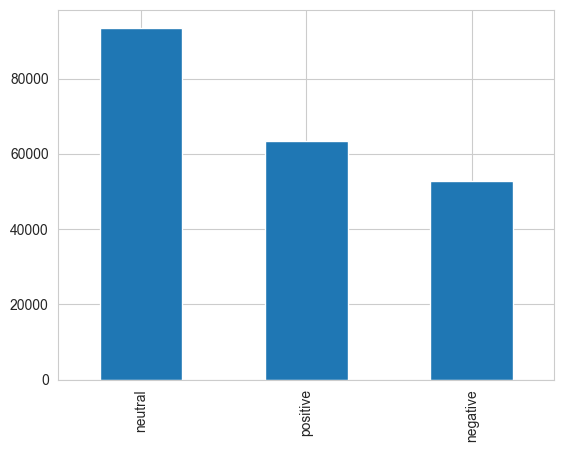

In [46]:
#count the number of positive, negative and neutral comments and visualize the result
df_label['polarity'].value_counts().plot(kind='bar')


In [47]:
#export to csv
df_label.to_csv('DataWithLabel.csv', index=False)
